#An analysis of paleo-present climate data

An analysis of paleo-present climate data
  - Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
  - Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
  - Examine Irish context:
    - Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)
  - Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats
  - For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).
  - Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue
  - Comment on accelerated warming based on very latest features (e.g. temperature

The European Project for Ice Coring in Antartica Dome ice core (EPICA) is a project that has been reconstructing the cliamte and atmospheric record going back 800,000 years (kyr).[[1]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2014GL061957).

This was achieved by drilling and extracting ice cores and measuring the levels of certain atmospheric molecules such as Carbon Dioxide (CO2), Methane (CH4) and deuterium which can be used as a proxy for temperature. The deeper you drill the further back in time you are looking. 

Two stations were set up in Concordia Station at Dome C and Kohnen Station Antartica. The drilling process began in 2004. They were able to obtain core samples at 3270.2m deep. At this depth the samples date back 800kyr.

There have been many other similar projects such as at Vostok station [[2]](https://www.ncei.noaa.gov/access/paleo-search/study/2443), a Russian research station in Antartica. Here they obtained samples dating back 420kyr.

By examining the levels of greenhouse gases in the samples they were able to show how the atmosphere changes over timee. As deuterium can be used as an indicator for temperature, they have been able to plot the levels of Co2 and other greenhouse gases against the temperature at the time. This allows an examination of any correlation that occurs between them. 

![graph showing relationship between greenhouse gases and temperature](https://www.e-education.psu.edu/geog3/sites/www.e-education.psu.edu.geog3/files/Mod6/Co2-temperature-records.png)



In 1958 at the Mauna Loa Observatory in Hawaii, C. David Keeling began recording CO2 levels in the air. They produce a monthly mean carbon dioxide level report. It is the longest record of direct measurements of Co2 in the atmosphere.

they also track CH4 and N20 levels. 

https://gml.noaa.gov/ccgg/trends/data.html

unc = levels of uncertainty

reading
https://www.e-education.psu.edu/geog3/sites/www.e-education.psu.edu.geog3/files/Mod6/Co2-temperature-records.png
#
https://rpubs.com/gregory_halverson/mauna_loa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



On the EPA website I found a database that has amalgamated the results from previous studies (EPICA Dome C, Vostok, Siple Station, Antarctica, Mauna Loa, Hawaii, Barrow, Alaska, Cape Matatula,  American Samoa, South Pole, Antarctica, Cape Grim, Australia, Lampedusa Island, Italy, Shetland Islands, Scotland) of Co2 atmosphere levels going back to 800kyr. The most recent datapoints were from 2015. As the Mauna Loa data is updated yearly I added 2016-2022 to the spreadsheet myself. 


As there are a number of overlaps between different studies, in cases where there are multiple values I will attempt to obtain an average value for that year. 


 )

In [2]:
#import dataset from Nature and compare composite values with IPCC
#nature dataset is downloaded as "41586_2008_BFnature06949_MOESM31_ESM.xls" and had one sheet called Composite. I have saved this as a seperate CSV file called nature_dataset.csv to allow easy import

nature = pd.read_csv('Nature_dataset.csv', skiprows=6,) #the data we want begins on line 7
nature = nature.iloc[:, :2]
nature.columns = ['Year', 'CO2(ppmv)'] #re-naming column 1
nature.head()


,Year,CO2(ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [3]:
nature.tail()

,Year,CO2(ppmv)
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4
1095,798512,191.0


Text(0.5, 0, 'Years, from 800kyr to 2022')

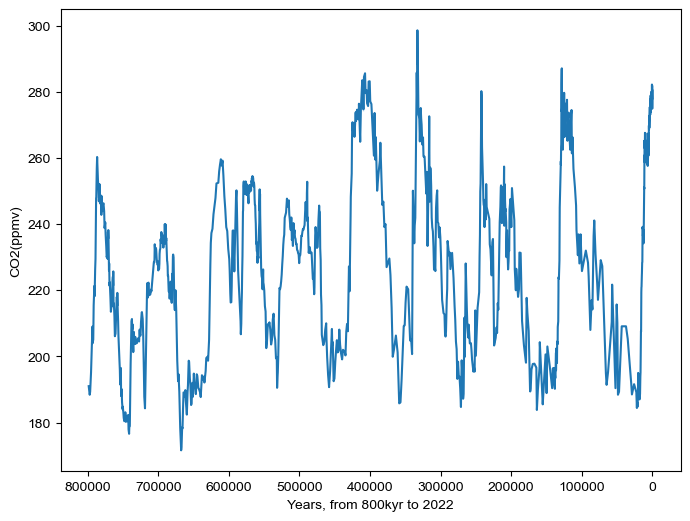

In [4]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(nature, x = "Year", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.gca().invert_xaxis() # reversing x axis so 2023 is furthest to the right

#plt.xlim(-800000, 0) # went to 10000 to allow us to see the values in the present day
#plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr to 2022')

There is also another dataset provided by The Intergovernmental Panel on Climate Change. This dataset has atmospheric Co2 values from 800ky bp up until 2020. This is an amalgamation of previous studies just like the Nature dataset but from eyeballing the values don't seem to be the same. For example IPCC has 1900 values going up until the year 2000 while Nature has 1095 values and only goes up until 1813. I will plot this dataset as well to see if it matches the previous plot

In [5]:
#import dataset from IPCC and compare composite values with Nature
#IPCC dataset is downloaded as "grl52461-sup-0003-supplementary.xls" and had one sheet called Composite. I have saved this as a seperate CSV file called 'grl52461-sup-0003-supplementary.csv' to allow easy import

ipcc = pd.read_csv('grl52461-sup-0003-supplementary.csv', skiprows=14,) #the data we want begins on line 7
ipcc = ipcc.iloc[:, :3] # only want the first 3 columns
ipcc.columns = ['Year', 'CO2(ppmv)', 'sigma mean CO2 (ppmv)'] #re-naming column 1
ipcc.tail()

,Year,CO2(ppmv),sigma mean CO2 (ppmv)
1896,803925.28,202.92,2.06
1897,804009.87,207.50,0.92
1898,804522.67,204.86,1.64
1899,805132.44,202.23,0.69
1900,805668.87,207.29,2.20


In [49]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(ipcc, x = "Year", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.gca().invert_xaxis() # reversing x axis so 2023 is furthest to the right

sns.regplot(x = ipcc['Year'], y = ipcc['CO2(ppmv)'], scatter=False, color='red', label='Trendline')

#plt.xlim(-800000, 0) # went to 10000 to allow us to see the values in the present day
#plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr to 2001')

ValueError: Could not interpret value `Year` for parameter `x`

<Figure size 800x600 with 0 Axes>

I want to plot them over lapping each other. First I need to normalise the year values. 

In all of these datasets "present" is the year 1950. I will attempt to normalise them from the year 2023.

Nature goes up to the year 137bp this equates to the year 1813.

In [7]:
nature['Corrected Years'] = 1950 -nature['Year'] #creating a new column with the correct year for each sample
nature = nature.iloc[:, [1, 2]]
nature.head()

,CO2(ppmv),Corrected Years
0,280.4,1813
1,274.9,1682
2,277.9,1671
3,279.1,1555
4,281.9,1546


In [8]:
ipcc['Corrected Years'] = 1950 -(ipcc['Year'].astype(int)) #creating a new column with the correct year for each sample
ipcc = ipcc.iloc[:, [1, 3]]
ipcc.head()


,CO2(ppmv),Corrected Years
0,368.02,2001
1,361.78,1998
2,359.65,1996
3,357.11,1994
4,353.95,1993


Text(0.5, 1.0, 'CO2 Values over Time')

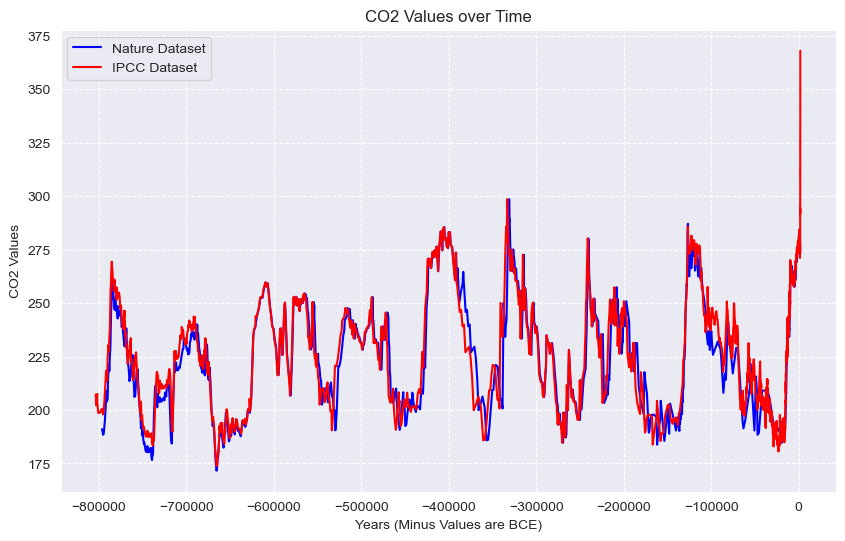

In [9]:
# Assuming 'Time' is the common index in both DataFrames
plt.figure(figsize=(10, 6))

# Plotting using Seaborn lineplot
sns.lineplot(data=nature, x = "Corrected Years", y = "CO2(ppmv)", color='blue', label='Nature Dataset')
sns.lineplot(data=ipcc, x = "Corrected Years", y = "CO2(ppmv)",  color='red', label='IPCC Dataset')

final_x_value = ipcc['Corrected Years'].iloc[-1]

# Set labels and title
plt.xlabel('Years (Minus Values are BCE)')
plt.ylabel('CO2 Values')
plt.title('CO2 Values over Time')

# Show legend
#plt.legend()

We can see the values are very similar and follow the same trend. Some parts of them seem to share the same CO2 values (y-axis value) but the year of sampling (x-axis) is slighty off (eg. between -400kyr and -300kyr). However in some other parts the inverse seems to be true (eg between -800kyr and -700kyr). 

As the IPCC dataset has more 805 more datapoints including both older and more recent years than the Nature dataset, this is the one we will work with going forward.

The IPCC dataset has compiled results from various studies at Law Dome [[ref]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/jgrd.50668), Dome C (Dome Concordia),[[ref]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1029/2004GL020338) West Antactic Ice Sheet [[ref]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2011GB004247), Siple Dome [[ref]](https://www.nature.com/articles/ncomms4723.pdf), EPICA Dronning Maud Land [[ref]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2015PA002874) and Vostok Station [[ref]](https://escholarship.org/content/qt7rx4413n/qt7rx4413n.pdf). All of these locations are in Antartica.


To bring this plot up to modern day (or as close as possible), we first need to find a dataset that has the results for CO2 levels from 2001-2023 in the same location. 

While Antartica has shown a consistent upward trend in CO2 levels the same as the rest of the world, given its remoteness its the last place to register the impacts of increasing emmissions from fossil fuels [[ref]](https://www.noaa.gov/south-pole-last-place-on-earth-to-pass-global-warming-milestone#:~:text=South%20Pole%20is%20last%20place%20on%20Earth%20to%20pass%20global%20warming%20milestone,-Focus%20areas%3A&text=The%20Earth%20passed%20another%20unfortunate,time%20in%204%20million%20years.). Therefore it is important that when comparing data from multiple different studies, the location remains the same. 

The Global Monitiroing Laboratory (GML) of the National Oceanic and Atmospheric Administration (NOAA) produce this data which contains contain atmospheric CO2 Dry Air Mole Fractions measurements at Barrow, Alaska (BRW); Mauna Loa, Hawaii (MLO); American Samoa (SMO); and South Pole (SPO), from 1973-2022. 

These datasets have been downloaded from the GML website[[ref]](https://gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/) as .txt files. For the ease of importing it to this notebook I converted the South Pole file to a csv and saved it as "co2_spo_surface_MonthlyData.csv" in my project folder. 

In [36]:
#reading in the dataset

spo_co2 = pd.read_csv('co2_spo_surface_MonthlyData.csv', skiprows=2) #the data we want begins on line 7
spo_co2 = spo_co2.iloc[:, [1, 2, 10]] 

spo_co2.head()

,year,month,value
0,1974,1,-999.99
1,1974,2,-999.99
2,1974,3,-999.99
3,1974,4,-999.99
4,1974,5,-999.99


According to the Readme for this dataset "Missing data will have a value of -999.99 for the mole fraction."

These need to be removed from the dataset. 

In [37]:
# Replace any instance of -999.99 to NaN which we will then remove
spo_co2.replace(-999.99, pd.NA, inplace=True) 
spo_co2.dropna(subset = ['value'])

# https://saturncloud.io/blog/how-to-delete-rows-with-null-values-in-a-specific-column-in-pandas-dataframe/#:~:text=a%20Specific%20Column-,One%20common%20approach%20to%20handle%20null%20values%20is%20to%20delete,values%20in%20the%20specified%20column.

,year,month,value
12,1975,1,328.19
13,1975,2,328.22
14,1975,3,328.88
22,1975,11,330.6
23,1975,12,329.72
...,...,...,...
583,2022,8,415.21
584,2022,9,415.59
585,2022,10,415.62
586,2022,11,415.53


In [38]:
#This dataset has a recorded value for every month. To remain consistent with our previous datasets, this will be averaged into an annual value.

spo_co2 = spo_co2.groupby('year')['value'].mean().reset_index() #averaging monthly values into a singular annual datapoint
spo_co2.head()

,year,value
0,1974,NaN
1,1975,329.122
2,1976,329.769167
3,1977,331.608333
4,1978,333.333636


Text(0.5, 1.0, 'CO2 Values over Time')

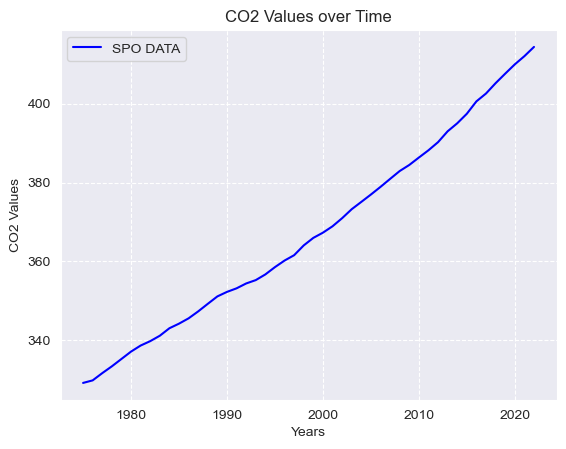

In [13]:
# Plotting using Seaborn lineplot
sns.lineplot(data=spo_co2, x = "year", y = "value", color='blue', label='SPO DATA')

#final_x_value = ipcc['Corrected Years'].iloc[-1]

# Set labels and title
plt.xlabel('Years')
plt.ylabel('CO2 Values')
plt.title('CO2 Values over Time')

# Show legend
#plt.legend()

In [43]:
# The IPCC dataset goes up to 2001. We are going to append the values of 2002-2022 from the SPO dataset. First we need to cleanse the data so its fits the same format

new_order = ['value', 'year']
spo_co2 = spo_co2[new_order] # reorder the columns so they fit the ipcc dataset
spo_co2.rename(columns = {'value': 'CO2(ppmv)', 'year': 'Corrected Years'}, inplace=True)
#spo_co2 = spo_co2[::-1] # reverse the order so it goes from recent to older. 

spo_co2.head()

,CO2(ppmv),Corrected Years
0,NaN,1974
1,329.122,1975
2,329.769167,1976
3,331.608333,1977
4,333.333636,1978


In [44]:
last_twenty_1_co2 = spo_co2.tail(21)
print(last_twenty_1_co2)

     CO2(ppmv)  Corrected Years
28    370.9375             2002
29  373.221667             2003
30  375.073333             2004
31  376.943333             2005
32     378.885             2006
33  380.908333             2007
34    382.9075             2008
35  384.451667             2009
36    386.3325             2010
37  388.178333             2011
38    390.2425             2012
39       393.0             2013
40  395.030833             2014
41  397.451667             2015
42  400.599167             2016
43  402.595833             2017
44  405.218333             2018
45  407.631667             2019
46  409.990833             2020
47    412.0725             2021
48      414.42             2022


In [45]:
ipcc = ipcc[::-1]
ipcc

complete_co2 = pd.concat([ipcc, last_twenty_1_co2], ignore_index = True)
complete_co2

,CO2(ppmv),Corrected Years
0,207.29,-803718
1,202.23,-803182
2,204.86,-802572
3,207.5,-802059
4,202.92,-801975
...,...,...
1917,405.218333,2018
1918,407.631667,2019
1919,409.990833,2020
1920,412.0725,2021


Text(0.5, 0, 'Years, from 800kyr to 2022')

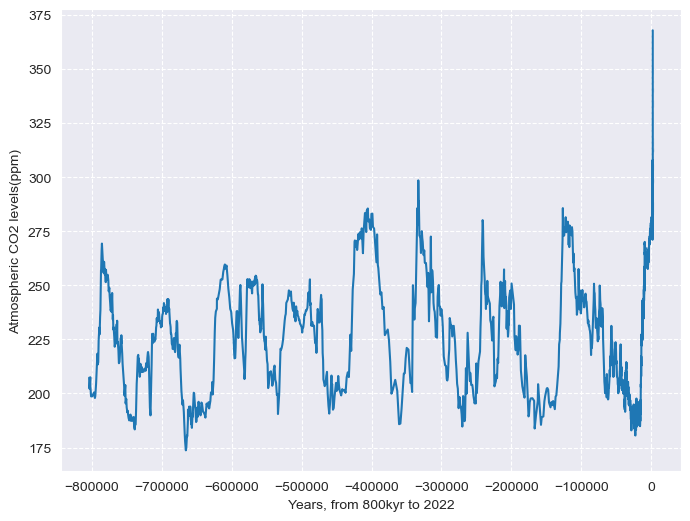

In [50]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(ipcc, x = "Corrected Years", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
#plt.gca().invert_xaxis() # reversing x axis so 2023 is furthest to the right

#sns.regplot(x = ipcc['Year'], y = ipcc['CO2(ppmv)'], scatter=False, color='red', label='Trendline')

#plt.xlim(-800000, 0) # went to 10000 to allow us to see the values in the present day
plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr to 2022')

We now have a dataset for CO2 levels going from 800kyr right up to 2022.

# Temperature

In [17]:
#reading in the dataset

jouzel = pd.read_csv('ghg-concentrations_fig-1.csv', skiprows=6,) #the data we want begins on line 7

In [18]:
carbon_dio.head()

,Year,"EPICA and Vostok Station, Antarctica","Law Dome, Antarctica (75-year smoothed)","Siple Station, Antarctica","Mauna Loa, Hawaii","Barrow, Alaska","Cape Matatula, American Samoa","South Pole, Antarctica","Cape Grim, Australia","Lampedusa Island, Italy","Shetland Islands, Scotland"
0,Ice Core Measurements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-796562,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-795149,188.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-794517,189.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-793252,195.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# I want to remove the first row as it has no relevant values.

co2 = carbon_dio.drop(0)
co2.head()

,Year,"EPICA and Vostok Station, Antarctica","Law Dome, Antarctica (75-year smoothed)","Siple Station, Antarctica","Mauna Loa, Hawaii","Barrow, Alaska","Cape Matatula, American Samoa","South Pole, Antarctica","Cape Grim, Australia","Lampedusa Island, Italy","Shetland Islands, Scotland"
1,-796562,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-795149,188.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-794517,189.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-793252,195.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-792658,199.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Create a new column that averages the others


co2['Average'] = co2[['EPICA and  Vostok Station,  Antarctica',	'Law Dome, Antarctica (75-year smoothed)',	'Siple Station, Antarctica',	'Mauna Loa, Hawaii',	'Barrow, Alaska',	'Cape Matatula,  American Samoa',	'South Pole, Antarctica',	'Cape Grim, Australia',	'Lampedusa Island, Italy',	'Shetland Islands, Scotland',	
]].mean(axis=1)

In [21]:
co2.tail(10)

,Year,"EPICA and Vostok Station, Antarctica","Law Dome, Antarctica (75-year smoothed)","Siple Station, Antarctica","Mauna Loa, Hawaii","Barrow, Alaska","Cape Matatula, American Samoa","South Pole, Antarctica","Cape Grim, Australia","Lampedusa Island, Italy","Shetland Islands, Scotland",Average
1357,2013,NaN,NaN,NaN,396.48,397.956667,394.3200,392.806667,NaN,NaN,NaN,395.390833
1358,2014,NaN,NaN,NaN,398.61,399.851667,396.1375,394.822500,NaN,NaN,NaN,397.355417
1359,2015,NaN,NaN,NaN,400.83,NaN,NaN,NaN,NaN,NaN,NaN,400.830000
1360,2016,NaN,NaN,NaN,404.41,NaN,NaN,NaN,NaN,NaN,NaN,404.410000
1361,2017,NaN,NaN,NaN,406.76,NaN,NaN,NaN,NaN,NaN,NaN,406.760000
1362,2018,NaN,NaN,NaN,408.72,NaN,NaN,NaN,NaN,NaN,NaN,408.720000
1363,2019,NaN,NaN,NaN,411.65,NaN,NaN,NaN,NaN,NaN,NaN,411.650000
1364,2020,NaN,NaN,NaN,414.21,NaN,NaN,NaN,NaN,NaN,NaN,414.210000
1365,2021,NaN,NaN,NaN,416.41,NaN,NaN,NaN,NaN,NaN,NaN,416.410000
1366,2022,NaN,NaN,NaN,418.53,NaN,NaN,NaN,NaN,NaN,NaN,418.530000


In [22]:

co2['Year'] = co2['Year'].astype(int)
co2['Year'].describe

<bound method NDFrame.describe of 1      -796562
2      -795149
3      -794517
4      -793252
5      -792658
         ...  
1362      2018
1363      2019
1364      2020
1365      2021
1366      2022
Name: Year, Length: 1366, dtype: int32>

Text(0.5, 0, 'Years, from 800kyr to 2022')

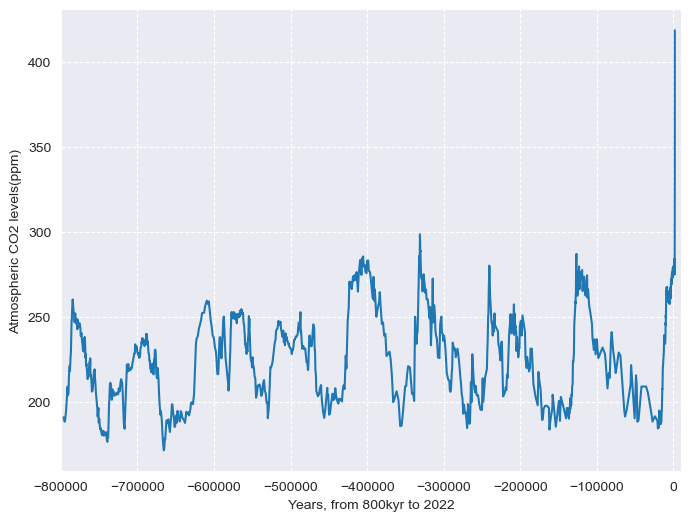

In [23]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(co2, x = "Year", y = "Average",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.xlim(-800000, 10000) # went to 10000 to allow us to see the values in the present day
plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr to 2022')


In [24]:
new_temp = pd.read_csv('New temp data.csv')

In [25]:
new_temp.head()

,Year,deutfinal,temp,acc-EDC3beta,Adjusted years,Deuterium,Temp
0,-55.000000,NaN,218.3,3.105321,2005.000000,NaN,218.3
1,-50.513333,NaN,218.3,3.104805,2000.513333,NaN,218.3
2,-46.026667,NaN,218.3,3.104404,1996.026667,NaN,218.3
3,-41.540000,NaN,218.3,3.104025,1991.540000,NaN,218.3
4,-34.516667,NaN,218.3,3.103453,1984.516667,NaN,218.3


In [26]:
#extract just the last 3 columns we need

temps = new_temp.iloc[:,-3:] 

In [27]:
temps.head()

,Adjusted years,Deuterium,Temp
0,2005.000000,NaN,218.3
1,2000.513333,NaN,218.3
2,1996.026667,NaN,218.3
3,1991.540000,NaN,218.3
4,1984.516667,NaN,218.3


In [28]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.lineplot(temps, x = "Adjusted years", y = "temp.1",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})

#plt.scatter(temps['Adjusted years'], temps['temp.1'], s=10 )
#plt.gca().invert_xaxis() # reversing x axis so 2023 is furthest to the right
plt.grid(True)

ValueError: Could not interpret value `temp.1` for parameter `y`

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot both XO2 and temp on the same plot with two y axis

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset on the primary y-axis (left)
ax1.plot(co2['Year'], co2['Average'], "g-", label= "CO2 Average")
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 Average', color='g')
ax1.tick_params('y', colors='g')

# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(temps['Adjusted years'], temps['temp.1'], 'b-', label='Temperature')
ax2.set_ylabel('Temperature', color='b')
ax2.tick_params('y', colors='b')

# Displaying legends for both datasets
#lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
#lines = lines_1 + lines_2
#labels = labels_1 + labels_2
plt.legend(lines, labels, loc='upper left')